In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images/255.0
test_images = test_images/255.0

In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [5]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [6]:
callbacks = myCallback()
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.4192 - accuracy: 0.8469
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 102s 54ms/step - loss: 0.4192 - accuracy: 0.8469


In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 14ms/step - loss: 0.3149 - accuracy: 0.8843


[0.3148777484893799, 0.8842999935150146]

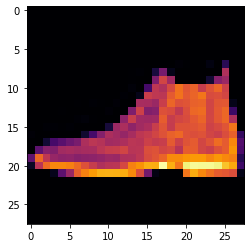

In [8]:
plt.imshow(test_images[0].reshape(28,28), cmap='inferno')